# State Data

We often take data for granted. However, one of the hardest parts about analyzing a problem you're interested in can be to find good data to answer the questions you want to ask. As you're learning R, though, there are many datasets that R has built in that you can take advantage of.

In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to,  region the state belongs to, and two-letter abbreviation.

Load the dataset and convert it to a data frame by running the following two commands in R:
```R
data(state)

statedata = cbind(data.frame(state.x77), state.abb, state.area, state.center,  state.division, state.name, state.region)
```
If you can't access the state dataset in R, here is a CSV file with the same data that you can load into R using the read.csv function: statedata.csv

After you have loaded the data into R, inspect the data set using the command: str(statedata)

This dataset has 50 observations (one for each US state) and the following 15 variables:

- Population - the population estimate of the state in 1975
- Income - per capita income in 1974
- Illiteracy - illiteracy rates in 1970, as a percent of the population
- Life.Exp - the life expectancy in years of residents of the state in 1970
- Murder - the murder and non-negligent manslaughter rate per 100,000 population in 1976 
- HS.Grad - percent of high-school graduates in 1970
- Frost - the mean number of days with minimum temperature below freezing from 1931–1960 in the capital or a large city of the state
- Area - the land area (in square miles) of the state
- state.abb - a 2-letter abreviation for each state
- state.area - the area of each state, in square miles
- x - the longitude of the center of the state
- y - the latitude of the center of the state
- state.division - the division each state belongs to (New England, Middle Atlantic, South Atlantic, East South Central, West South Central, East North Central, West North Central, Mountain, or Pacific)
- state.name - the full names of each state
- state.region - the region each state belong to (Northeast, South, North Central, or West)

We begin by exploring the data. Plot all of the states' centers with latitude on the y axis (the "y" variable in our dataset) and longitude on the x axis (the "x" variable in our dataset). The shape of the plot should look like the outline of the United States! Note that Alaska and Hawaii have had their coordinates adjusted to appear just off of the west coast.

In [1]:
state = read.csv('./dataset/statedata.csv')

In [3]:
data(state)
statedata = cbind(data.frame(state.x77), state.abb, state.area, state.center,  state.division, state.name, state.region)

In [4]:
str(statedata)

'data.frame':	50 obs. of  15 variables:
 $ Population    : num  3615 365 2212 2110 21198 ...
 $ Income        : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy    : num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp      : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder        : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad       : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost         : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area          : num  50708 566432 113417 51945 156361 ...
 $ state.abb     : Factor w/ 50 levels "AK","AL","AR",..: 2 1 4 3 5 6 7 8 9 10 ...
 $ state.area    : num  51609 589757 113909 53104 158693 ...
 $ x             : num  -86.8 -127.2 -111.6 -92.3 -119.8 ...
 $ y             : num  32.6 49.2 34.2 34.7 36.5 ...
 $ state.division: Factor w/ 9 levels "New England",..: 4 9 8 5 9 8 1 3 3 3 ...
 $ state.name    : Factor w/ 50 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ state.region  : Factor w/ 4 levels "

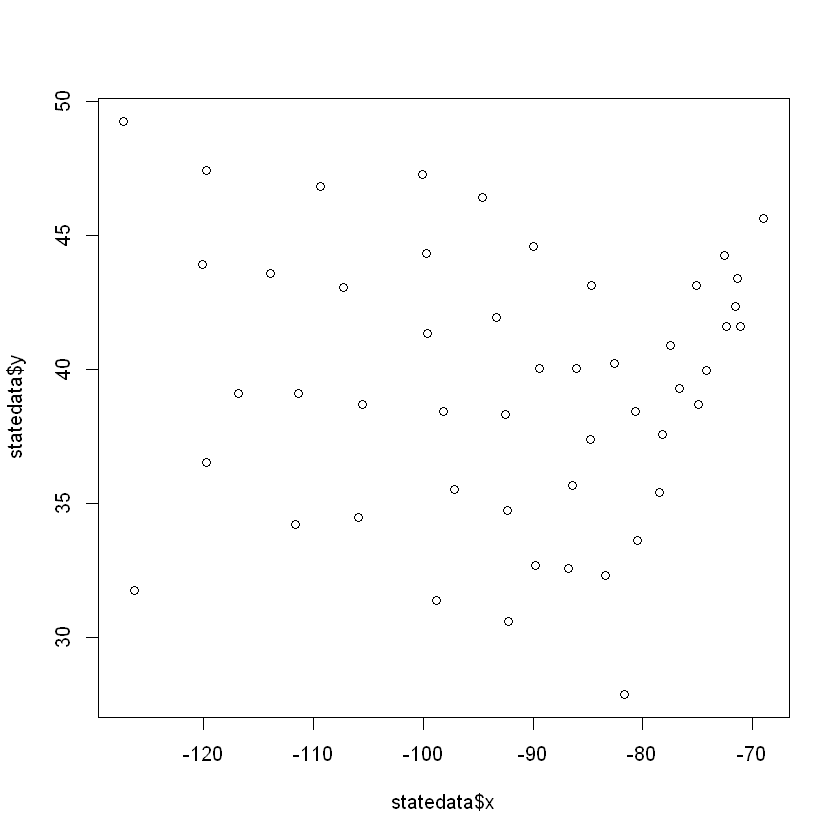

In [5]:
plot(statedata$x, statedata$y)

Using the tapply command, determine which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region:

In [6]:
tapply(statedata$HS.Grad, state$state.region, mean)

North Central     Northeast         South          West 
     54.51667      53.96667      44.34375      62.00000

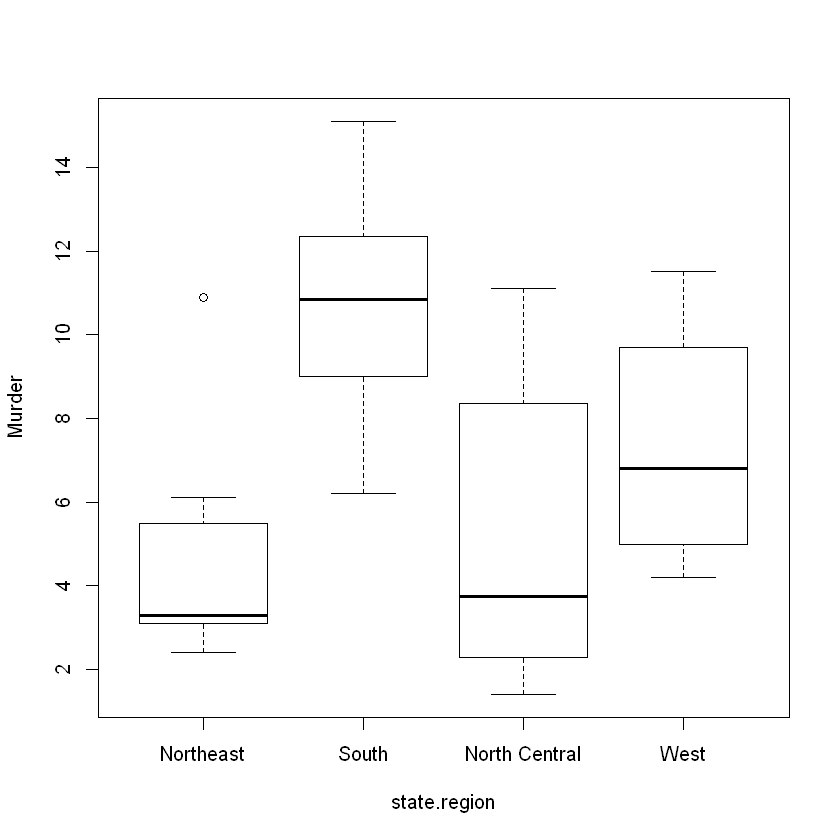

In [14]:
boxplot(Murder~state.region, data=statedata)

You should see that there is an outlier in the Northeast region of the boxplot you just generated. Which state does this correspond to? (Hint: There are many ways to find the answer to this question, but one way is to use the subset command to only look at the Northeast data.)

In [15]:
northeast = subset(statedata, state.region == 'Northeast')

In [19]:
northeast$state.name[which.max(northeast$Murder)]

[1] New York
50 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

We would like to build a model to predict life expectancy by state using the state statistics we have in our dataset.

Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area). Note that you should use the variable "Area" in your model, NOT the variable "state.area".

In [21]:
LERegs = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata)

In [22]:
summary(LERegs)


Call:
lm(formula = Life.Exp ~ Population + Income + Illiteracy + Murder + 
    HS.Grad + Frost + Area, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
HS.Grad      4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10


Now plot a graph of life expectancy vs. income using the command:
```R
plot(statedata$Income, statedata$Life.Exp)
```
Visually observe the plot. What appears to be the relationship?

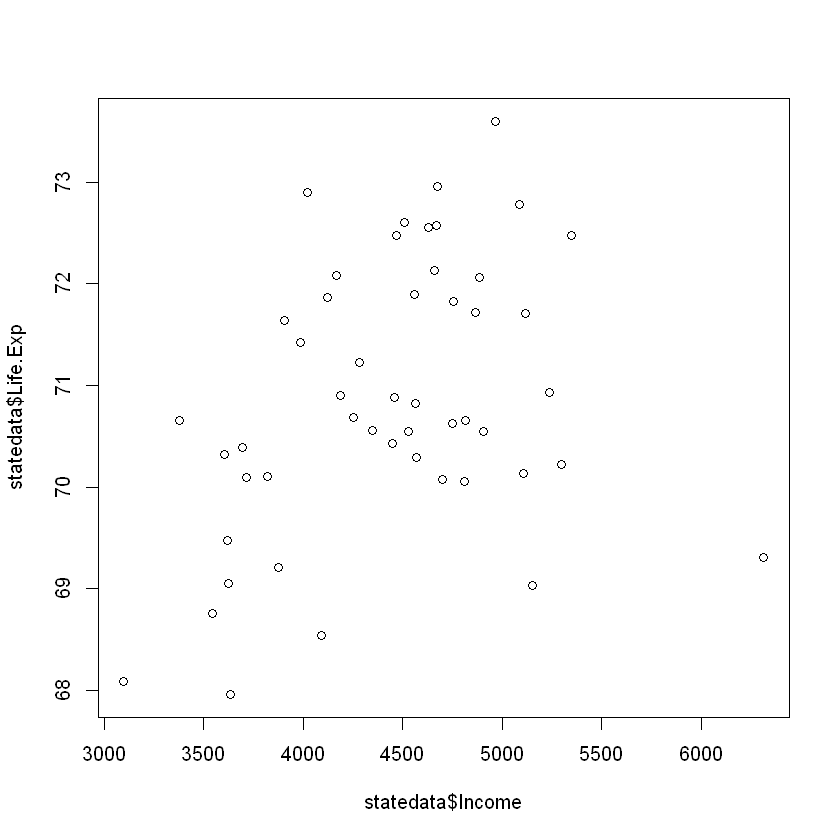

In [23]:
plot(statedata$Income, statedata$Life.Exp)

Recall that we discussed the principle of simplicity: that is, a model with fewer variables is preferable to a model with many unnnecessary variables. Experiment with removing independent variables from the original model. Remember to use the significance of the coefficients to decide which variables to remove (remove the one with the largest "p-value" first, or the one with the "t value" closest to zero), and to remove them one at a time (this is called "backwards variable selection"). This is important due to multicollinearity issues - removing one insignificant variable may make another previously insignificant variable become significant.

In [24]:
LERegs2 = lm(Life.Exp ~ Population + Murder + HS.Grad + Frost, data=statedata)
summary(LERegs2)


Call:
lm(formula = Life.Exp ~ Population + Murder + HS.Grad + Frost, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47095 -0.53464 -0.03701  0.57621  1.50683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.103e+01  9.529e-01  74.542  < 2e-16 ***
Population   5.014e-05  2.512e-05   1.996  0.05201 .  
Murder      -3.001e-01  3.661e-02  -8.199 1.77e-10 ***
HS.Grad      4.658e-02  1.483e-02   3.142  0.00297 ** 
Frost       -5.943e-03  2.421e-03  -2.455  0.01802 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7197 on 45 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7126 
F-statistic: 31.37 on 4 and 45 DF,  p-value: 1.696e-12


In [26]:
LEPredictions = predict(LERegs2)
sort(LEPredictions)

Alabama        Georgia    Mississippi South Carolina      Louisiana 
      68.48112       68.63694       69.00535       69.06109       69.15045 
      Kentucky North Carolina      Tennessee         Nevada       Arkansas 
      69.24418       69.28624       69.46583       69.52482       69.57374 
        Alaska       Michigan          Texas     New Mexico       Missouri 
      69.85740       69.86893       69.97886       70.03119       70.10610 
      Virginia       Illinois  West Virginia       Maryland        Florida 
      70.14691       70.19244       70.44983       70.51852       70.61539 
      New York        Wyoming        Indiana        Vermont           Ohio 
      70.62937       70.87679       70.90159       71.06135       71.08549 
      Colorado       Delaware       Oklahoma   Pennsylvania        Montana 
      71.10354       71.12647       71.15860       71.38046       71.40025 
       Arizona          Idaho     New Jersey  New Hampshire   Rhode Island 
      71.41416       71.49989       71.59612       71.72636       71.76007 
    California          Maine   North Dakota         Kansas      Wisconsin 
      71.79565       71.86095       71.87649       71.90352       72.00996 
  South Dakota    Connecticut           Utah         Hawaii       Nebraska 
      72.01161       72.03459       72.05753       72.09317       72.17032 
     Minnesota           Iowa         Oregon  Massachusetts     Washington 
      72.26560       72.39653       72.41445       72.44105       72.68272

In [27]:
statedata$state.name[which.min(statedata$Life.Exp)]

[1] South Carolina
50 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

In [28]:
statedata$state.name[which.max(statedata$Life.Exp)]

[1] Hawaii
50 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

In [37]:
sort(abs(LERegs2$residuals))

Indiana        Florida       Illinois       Virginia   South Dakota 
    0.02158526     0.04460505     0.05244160     0.06691392     0.06839119 
North Carolina       New York     California        Georgia   Rhode Island 
    0.07624179     0.07937149     0.08564599     0.09694227     0.13992982 
          Iowa       Oklahoma           Ohio         Oregon     New Mexico 
    0.16347124     0.26139958     0.26548767     0.28445333     0.28880945 
      Maryland          Idaho      Louisiana       Nebraska    Connecticut 
    0.29851996     0.37010714     0.39044846     0.42967691     0.44541028 
     Wisconsin         Nevada  New Hampshire         Alaska        Alabama 
    0.47004324     0.49482393     0.49635615     0.54740399     0.56888134 
       Vermont       Missouri        Wyoming  Massachusetts      Tennessee 
    0.57865019     0.58389969     0.58678863     0.61105391     0.64416651 
    New Jersey         Kansas      Minnesota       Michigan        Montana 
    0.66612086     0.67648037     0.69440380     0.76106640     0.84024805 
          Utah       Kentucky        Arizona   North Dakota    Mississippi 
    0.84246817     0.85582067     0.86415671     0.90350550     0.91535384 
         Texas   Pennsylvania       Colorado     Washington  West Virginia 
    0.92114057     0.95045527     0.95645816     0.96272426     0.96982588 
      Delaware       Arkansas South Carolina          Maine         Hawaii 
    1.06646884     1.08626119     1.10109172     1.47095411     1.50683146